In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_curve, auc, accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
class_names = ['IEDB_Tryp', 'UNIPROT_RANDOM']
feature_names = ["Starting_Position", "Ending_Position", "Bepipred3", "Emini", "Kolaskar", "ChouFosman", "KarplusSchulz", "Parker", "MW", "IP", "Hydropathy"]

In [ ]:
class DecisionTree:
  def __init__(self):
      self.model = None

  def train(self, X_train, y_train, height):
      self.model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
      self.model.fit(X_train, y_train)

  def predict(self, X_test):
      if self.model is None:
          raise Exception("Model not trained yet. Please train the model first.")
      return self.model.predict(X_test)

In [ ]:
def evaluate(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Recall (Sensibilidade)
    recall = recall_score(y_true, y_pred, pos_label=class_names[0])
    print("Recall (Sensitivity) for '" + class_names[0] + "':", recall)

    recall = recall_score(y_true, y_pred, pos_label=class_names[1])
    print("Recall (Sensitivity) for '" + class_names[1] + "':", recall)

    # Especificidade
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

    # F1-Score
    f1 = f1_score(y_true, y_pred, average="weighted")
    print("F1 Score:", f1)

    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
# Função para carregar o dataset
def load_dataset(file_path):
    # Carregar o dataset separado por tab
    df = pd.read_csv(file_path, sep="\t")

    df.head()

    # Verifica o shape dos dados
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

    # Resumo Estatístico dos dados
    df.describe()

    # Remover as colunas 'id' e 'Name'
    df = df.drop(["id", "Name"], axis=1)

    # Definir a coluna que contém os rótulos / classes alvo
    target_column = "grupo"

    # Separar features e labels
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=1, stratify=y
    )

    # Verifica as proporções de classes nos dados
    print("### Proporção de Classes em Treino ###")
    print(
        f"Porcentagem de entradas Classe 0: {y_train.value_counts(normalize=True).values[0] * 100}%"
    )
    print(
        f"Porcentagem de entradas Classe 1: {y_train.value_counts(normalize=True).values[1] * 100}%"
    )
    print()

    print("### Proporção de Classes em Teste ###")
    print(
        f"Porcentagem de entradas Classe 0: {y_test.value_counts(normalize=True).values[0] * 100}%"
    )
    print(
        f"Porcentagem de entradas Classe 1: {y_test.value_counts(normalize=True).values[1] * 100}%"
    )
    print()

    return X_train, X_test, y_train, y_test

This dataset has 4288 rows and 14 columns.

### Proporção de Classes em Treino ###
Porcentagem de entradas Classe 0: 53.51549483505498%
Porcentagem de entradas Classe 1: 46.48450516494502%

### Proporção de Classes em Teste ###
Porcentagem de entradas Classe 0: 53.535353535353536%
Porcentagem de entradas Classe 1: 46.464646464646464%

Accuracy: 0.933954933954934
Recall (Sensitivity) for 'IEDB_Tryp': 0.9448476052249637
Recall (Sensitivity) for 'UNIPROT_RANDOM': 0.9214046822742475
Specificity: 0.9448476052249637
F1 Score: 0.9339188299227027


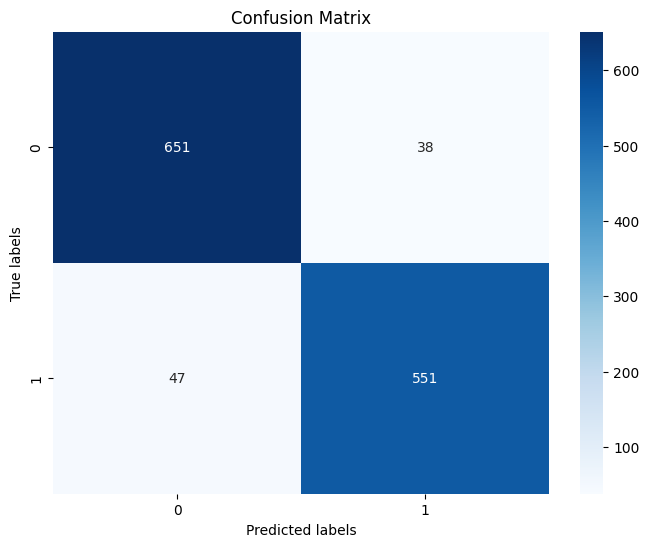

In [ ]:
if __name__ == "__main__":
  model = DecisionTree()

  # Carregar o dataset
  file_path = "dataset.csv"
  X_train, X_test, y_train, y_test = load_dataset(file_path)

  # Criar e treinar o modelo
  model.train(X_train, y_train, 20)

  # Fazer previsões no conjunto de teste
  y_pred = model.predict(X_test)

  # Avaliar o modelo
  evaluate(y_test, y_pred)